# Image Gradients

[Image Gradients](https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from custom_utils import *

import logging

In [2]:
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
 )

[14:29:39] INFO - Showing image ... (12.35 x 8.2)
[14:29:39] INFO - Showing image ... (12.35 x 8.2)


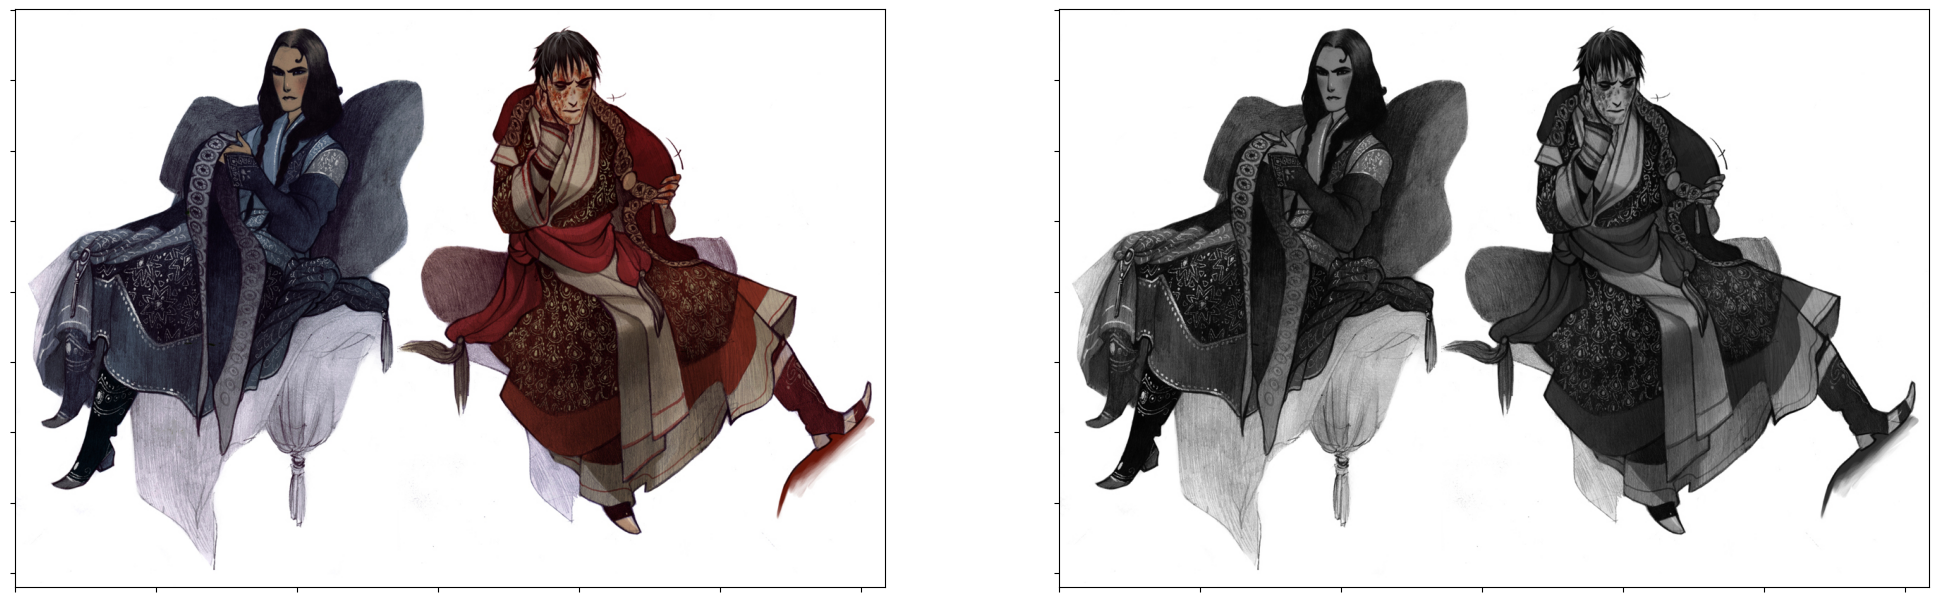

In [3]:
height, width, img, img_rgb, img_gray = load_image_and_show('../data/phobs1.jpeg')

OpenCV provides three types of gradient filters or High-pass filters:

- Sobel
- Scharr
- Laplacian

```
A high pass filter is the basis for most sharpening methods. An image is sharpened when contrast is enhanced between adjoining areas with little variation in brightness or darkness. A high pass filter tends to retain the high frequency information within an image while reducing the low frequency information.
```

[14:49:46] INFO - Showing image ... (12.35 x 8.2)
[14:49:46] INFO - Showing image ... (12.35 x 8.2)
[14:49:46] WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
[14:49:46] INFO - Showing image ... (12.35 x 8.2)
[14:49:46] WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
[14:49:46] INFO - Showing image ... (12.35 x 8.2)
[14:49:46] WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


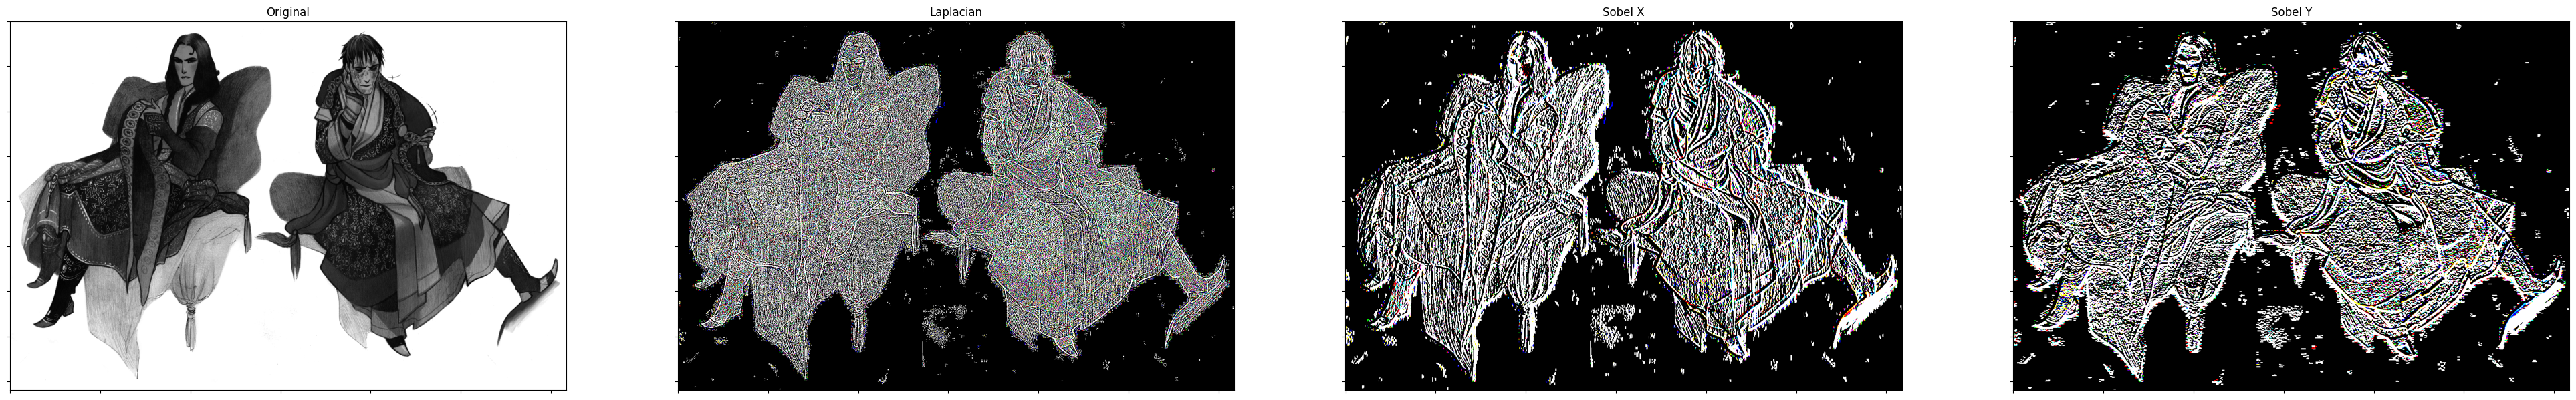

In [7]:
laplacian = cv.Laplacian(img_rgb, cv.CV_64F)
sobelx = cv.Sobel(img_rgb, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']
_, ax = plt.subplots(1, 4, figsize=(width*4/100, height/100))
for i, im in enumerate([img_gray, laplacian, sobelx, sobely]):
    show_image(im, ax=ax[i], title=titles[i], imshow_args={'cmap': 'gray'})

plt.show()

[14:55:03] INFO - Showing image ... (12.35 x 8.2)
[14:55:03] INFO - Showing image ... (12.35 x 8.2)
[14:55:03] INFO - Showing image ... (12.35 x 8.2)


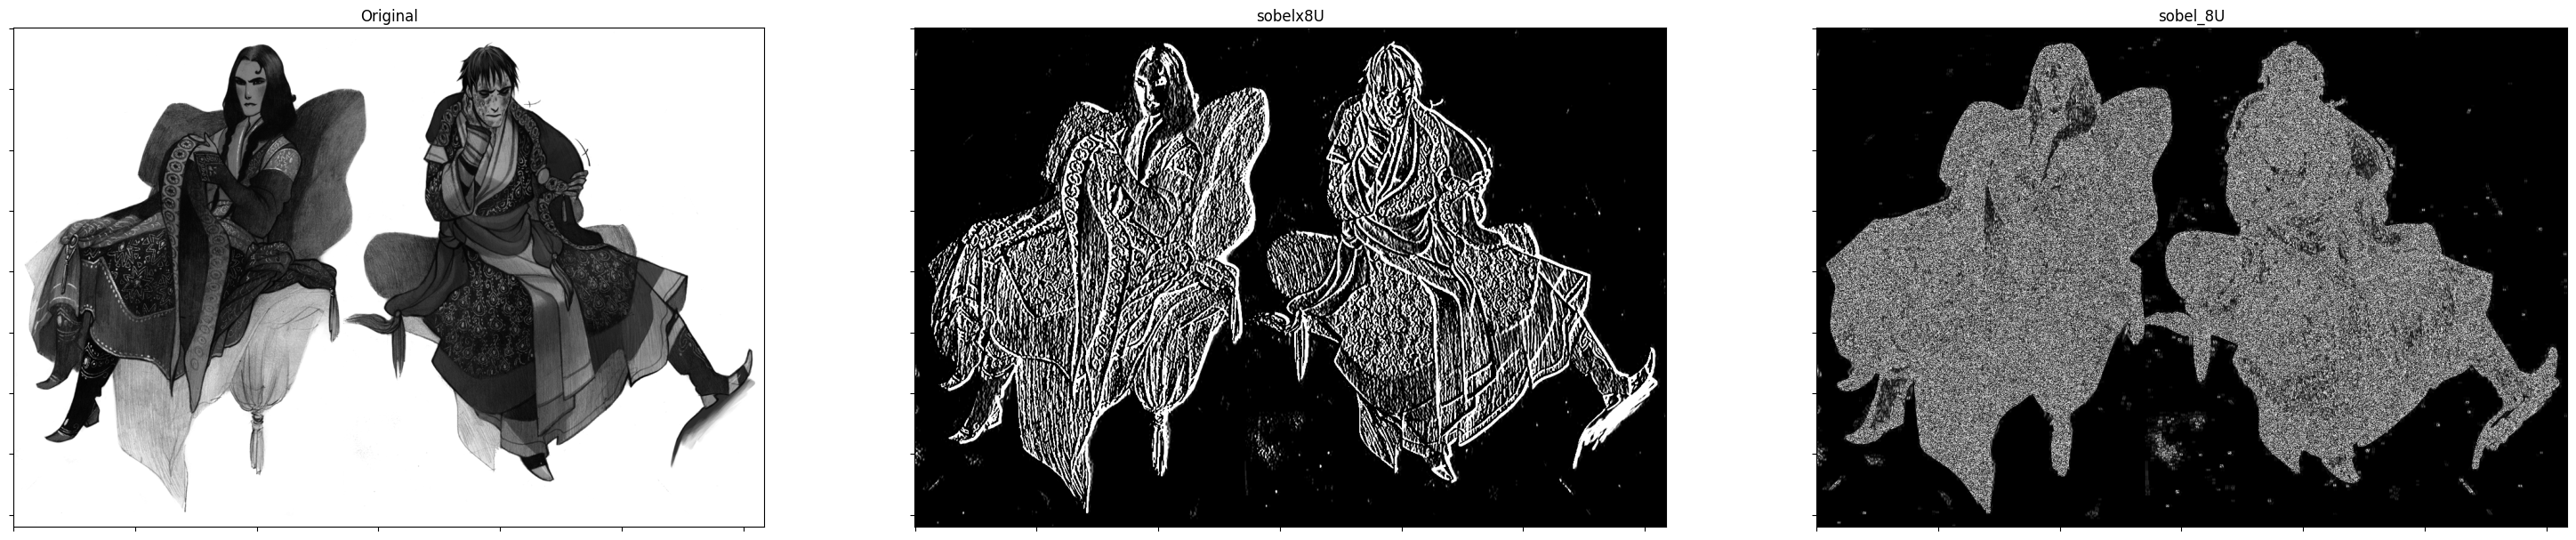

In [11]:
# Output dtype = cv.CV_8U
sobelx8U = cv.Sobel(img_gray, cv.CV_8U, 1, 0, ksize=5)

# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64F = np.abs(cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=5))
sobel_8U = np.uint8(sobelx64F)

titles = ['Original', 'sobelx8U', 'sobel_8U']
_, ax = plt.subplots(1, 3, figsize=(width*3/100, height/100))
for i, im in enumerate([img_gray, sobelx8U, sobel_8U]):
    show_image(im, ax=ax[i], title=titles[i], imshow_args={'cmap': 'gray'})

plt.show()